2018 KAGGLE MACHİNE LEARNİNG & DATA SCİENCE SURVEY

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import plotly.graph_objects as go
import seaborn as sns
import scipy

In [29]:
df =pd.read_csv("multipleChoiceResponses.csv",low_memory=False)
df.drop([0], axis=0,inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23859 entries, 1 to 23859
Columns: 395 entries, Time from Start to Finish (seconds) to Q50_OTHER_TEXT
dtypes: object(395)
memory usage: 71.9+ MB


In [31]:
df.describe()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
count,23859,23859,23859,23859,23859,23438,22947,22900,23859,21685,...,23859,1371,6478,2674,2104,3569,1059,2500,520,23859
unique,6522,4,67,12,58,7,13,21,863,19,...,169,1,1,1,1,1,1,1,1,409
top,142,Male,-1,25-29,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Student,-1,Computers/Technology,...,-1,Too expensive,Too time-consuming,Requires too much technical knowledge,Afraid that others will use my work without gi...,Not enough incentives to share my work,I had never considered making my work easier f...,None of these reasons apply to me,Other,-1
freq,31,19430,23780,6159,4716,10855,9430,5253,22537,5584,...,23689,1371,6478,2674,2104,3569,1059,2500,520,23428


CLEANİNG DATA

In [32]:
df.rename(columns={"Q1" : "Gender", "Q2" : "Age range","Q3" : "Country","Q5" : "Which best describes your undergraduate major?",
"Q13_Part_1" : "Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years? Jupyter/IPython",
"Q16_Part_1" : "What programming languages do you use on a regular basis?",
"Q21_Part_1" : "What data visualization libraries or tools have you used in the past 5 years?",
"Q26":"Do you consider yourself to be a data scientist?",
"Q32":"What is the type of data that you currently interact with most often at work or school?",
"Q33_Part_1" : "Where do you find public datasets?",
"Q34_Part_1" : "During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? Gathering data",
"Q36_Part_1" : "On which online platforms have you begun or completed data science courses?",
"Q37" : "On which online platform have you spent the most amount of time?",
"Q44_Part_1" : "What do you find most difficult about ensuring that your algorithms are fair and unbiased?",
"Q22" : "Which specific data visualization library or tool did you use the most?"},inplace=True)



df=df[["Gender","Age range","Country","Which best describes your undergraduate major?",
"Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years? Jupyter/IPython",
"What programming languages do you use on a regular basis?",
"What data visualization libraries or tools have you used in the past 5 years?",
"Do you consider yourself to be a data scientist?",
"What is the type of data that you currently interact with most often at work or school?",
"Where do you find public datasets?",
"During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? Gathering data",
"On which online platforms have you begun or completed data science courses?",
"On which online platform have you spent the most amount of time?",
"What do you find most difficult about ensuring that your algorithms are fair and unbiased?",
"Which specific data visualization library or tool did you use the most?","Q17","Q18",
"Q29_Part_1","Q29_Part_2","Q29_Part_3","Q29_Part_4","Q29_Part_5","Q29_Part_6","Q29_Part_7","Q29_Part_8",
"Q29_Part_9","Q29_Part_10","Q29_Part_11","Q29_Part_12","Q29_Part_13","Q29_Part_14","Q29_Part_15","Q29_Part_16","Q29_Part_17","Q29_Part_18",
"Q29_Part_19","Q29_Part_20","Q29_Part_21","Q29_Part_22","Q29_Part_23","Q29_Part_24","Q29_Part_25","Q29_Part_26","Q29_Part_28","Q40"]]


In [33]:
df.describe()

,Gender,Age range,Country,Which best describes your undergraduate major?,Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years? Jupyter/IPython,What programming languages do you use on a regular basis?,What data visualization libraries or tools have you used in the past 5 years?,Do you consider yourself to be a data scientist?,What is the type of data that you currently interact with most often at work or school?,Where do you find public datasets?,...,Q29_Part_19,Q29_Part_20,Q29_Part_21,Q29_Part_22,Q29_Part_23,Q29_Part_24,Q29_Part_25,Q29_Part_26,Q29_Part_28,Q40
count,23859,23859,23859,22947,14010,15711,7751,18480,13878,4757,...,252,213,668,137,66,61,53,255,563,15879
unique,4,12,58,13,1,1,1,5,12,1,...,1,1,1,1,1,1,1,1,1,6
top,Male,25-29,United States of America,"Computer science (software engineering, etc.)",Jupyter/IPython,Python,ggplot2,Probably yes,Numerical Data,Government websites,...,Azure Database for MySQL,Azure Cosmos DB,Azure SQL Database,Azure Database for PostgreSQL,IBM Cloud Compose,IBM Cloud Compose for MySQL,IBM Cloud Compose for PostgreSQL,IBM Cloud Db2,Other,Independent projects are much more important t...
freq,19430,6159,4716,9430,14010,15711,7751,4893,3588,4757,...,252,213,668,137,66,61,53,255,563,4990


In [34]:
df["Age range"].value_counts()

25-29    6159
22-24    5141
30-34    3776
18-21    3037
35-39    2253
40-44    1360
45-49     858
50-54     582
55-59     328
60-69     273
70-79      53
80+        39
Name: Age range, dtype: int64

In [35]:
df["Gender"].value_counts()

Male                       19430
Female                      4010
Prefer not to say            340
Prefer to self-describe       79
Name: Gender, dtype: int64

In [36]:
df["Country"].value_counts()

United States of America                                4716
India                                                   4417
China                                                   1644
Other                                                   1036
Russia                                                   879
Brazil                                                   736
Germany                                                  734
United Kingdom of Great Britain and Northern Ireland     702
Canada                                                   604
France                                                   604
Japan                                                    597
Spain                                                    485
I do not wish to disclose my location                    394
Italy                                                    355
Australia                                                330
Turkey                                                   327
Poland                  

In [37]:
df["Which best describes your undergraduate major?"].value_counts()

Computer science (software engineering, etc.)                    9430
Engineering (non-computer focused)                               3705
Mathematics or statistics                                        2950
A business discipline (accounting, economics, finance, etc.)     1791
Physics or astronomy                                             1110
Information technology, networking, or system administration     1029
Medical or life sciences (biology, chemistry, medicine, etc.)     871
Other                                                             770
Social sciences (anthropology, psychology, sociology, etc.)       554
Humanities (history, literature, philosophy, etc.)                269
Environmental science or geology                                  253
I never declared a major                                          128
Fine arts or performing arts                                       87
Name: Which best describes your undergraduate major?, dtype: int64

In [38]:
df[ "Do you consider yourself to be a data scientist?"].value_counts()

Probably yes      4893
Definitely yes    4684
Maybe             4184
Probably not      3162
Definitely not    1557
Name: Do you consider yourself to be a data scientist?, dtype: int64

In [39]:
df[ "What is the type of data that you currently interact with most often at work or school?"].value_counts()

Numerical Data      3588
Tabular Data        2680
Text Data           2005
Time Series Data    1664
Image Data          1635
Categorical Data     998
Sensor Data          494
Geospatial Data      257
Video Data           204
Genetic Data         173
Audio Data           117
Other Data            63
Name: What is the type of data that you currently interact with most often at work or school?, dtype: int64

In [40]:
df["On which online platform have you spent the most amount of time?"].value_counts()

Coursera                     3748
DataCamp                     1166
Udemy                        1146
Udacity                       816
edX                           778
Kaggle Learn                  663
Online University Courses     502
Other                         337
Fast.AI                       266
developers.google.com         117
DataQuest                     105
TheSchool.AI                   26
Name: On which online platform have you spent the most amount of time?, dtype: int64

In [41]:
df["Which specific data visualization library or tool did you use the most?"].value_counts()

Matplotlib    6707
ggplot2       2877
Seaborn       1334
Plotly         540
D3             243
Shiny          199
Other          110
Bokeh           77
Leaflet         39
Lattice         33
Altair          16
Geoplotlib       9
Name: Which specific data visualization library or tool did you use the most?, dtype: int64

In [42]:
df["Q40"].value_counts()

Independent projects are much more important than academic achievements        4990
Independent projects are slightly more important than academic achievements    4473
Independent projects are equally important as academic achievements            4343
No opinion; I do not know                                                       936
Independent projects are slightly less important than academic achievements     831
Independent projects are much less important than academic achievements         306
Name: Q40, dtype: int64

In [43]:
df.groupby("Q40").get_group("Independent projects are much more important than academic achievements").count()["Q40"]



4990

In [44]:
df.groupby("Q40").get_group("Independent projects are slightly more important than academic achievements").count()["Q40"]

4473

In [45]:
df.groupby("Q40").get_group("Independent projects are equally important as academic achievements").count()["Q40"]

4343

In [46]:
df.groupby("Q40").get_group("No opinion; I do not know").count()["Q40"]

936

In [47]:
df.groupby("Q40").get_group("Independent projects are slightly less important than academic achievements").count()["Q40"]

831

In [48]:
df.groupby("Q40").get_group("Independent projects are slightly less important than academic achievements").count()["Q40"]

831

In [49]:
df["Q18"].value_counts()

Python        14181
R              2342
SQL             914
C++             339
MATLAB          256
Java            184
Other           161
None            132
Scala            74
Javascript       72
SAS              69
VBA              38
Go               26
Name: Q18, dtype: int64

In [50]:
df["Q17"].value_counts()

Python                   8180
R                        2046
SQL                      1211
Java                      903
C/C++                     739
C#/.NET                   432
Javascript/Typescript     408
MATLAB                    355
SAS/STATA                 228
PHP                       191
Visual Basic/VBA          135
Other                     117
Scala                     106
Bash                       59
Ruby                       55
Go                         46
Julia                      11
Name: Q17, dtype: int64

VİSUALİZİNG DATA

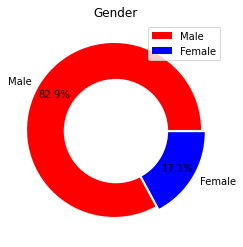

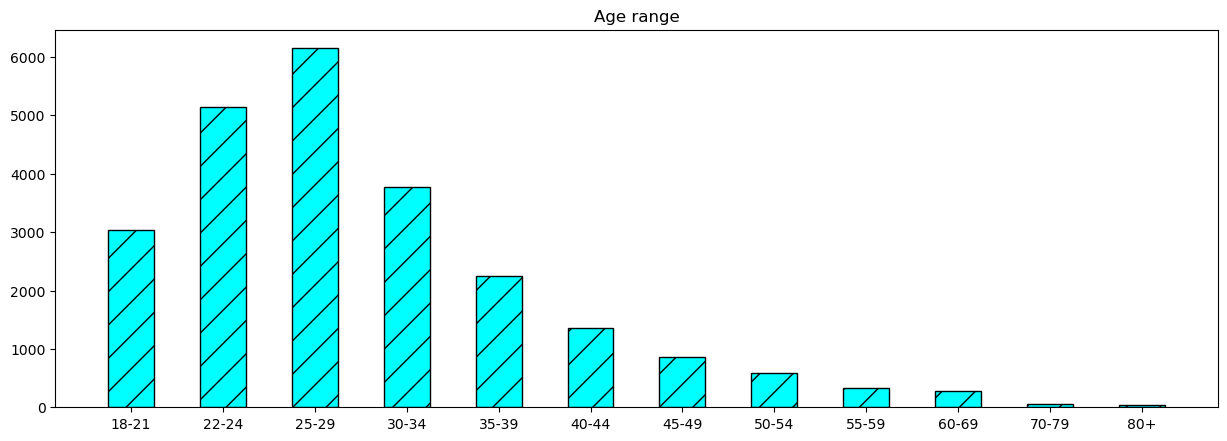

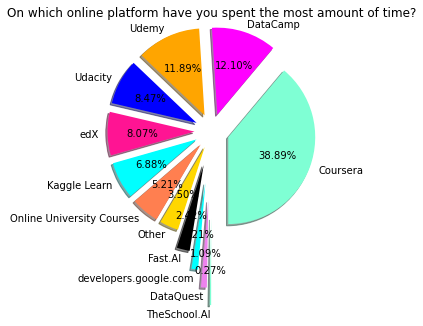

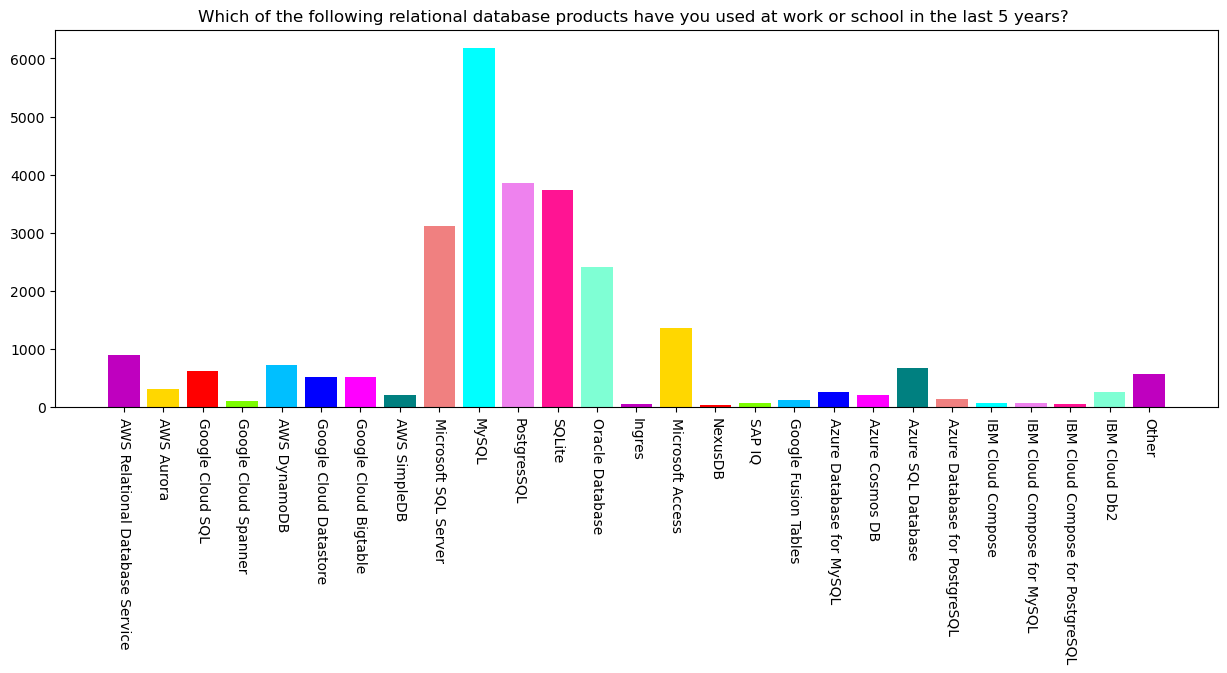

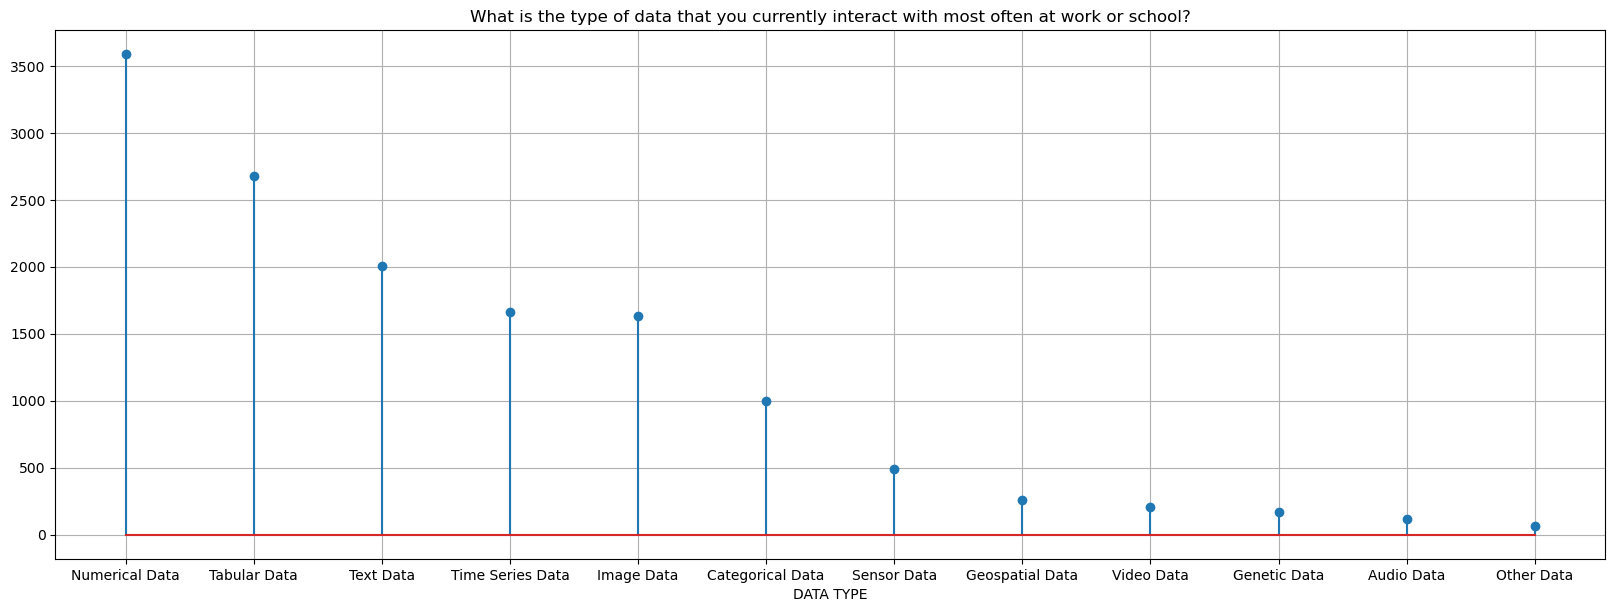

<Figure size 432x288 with 0 Axes>

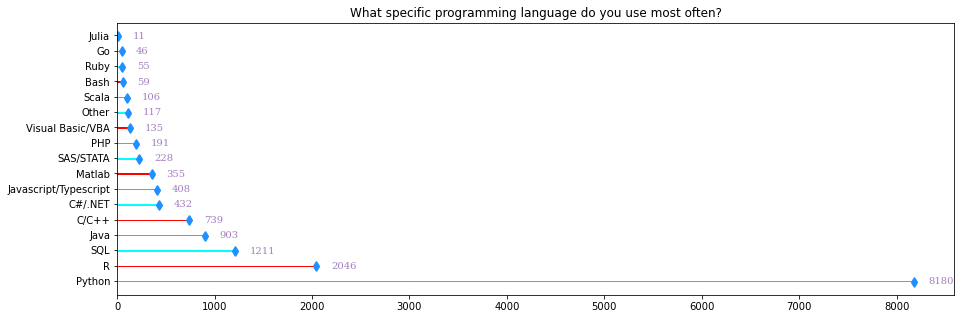

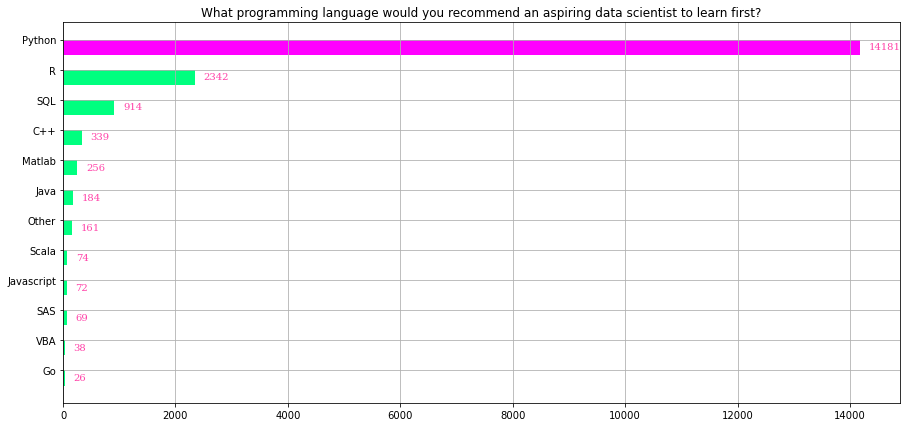

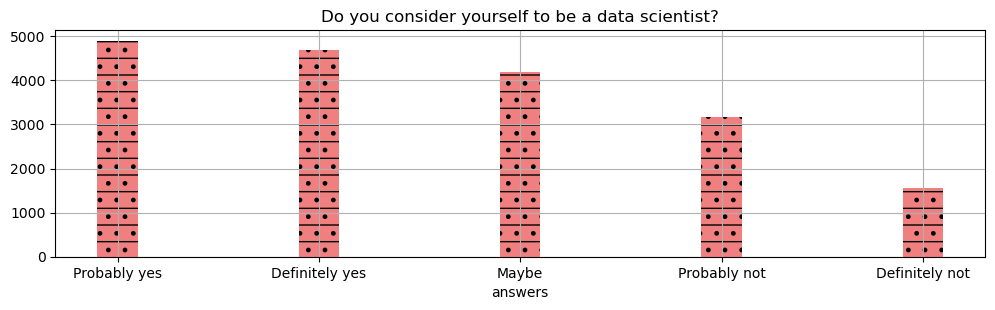

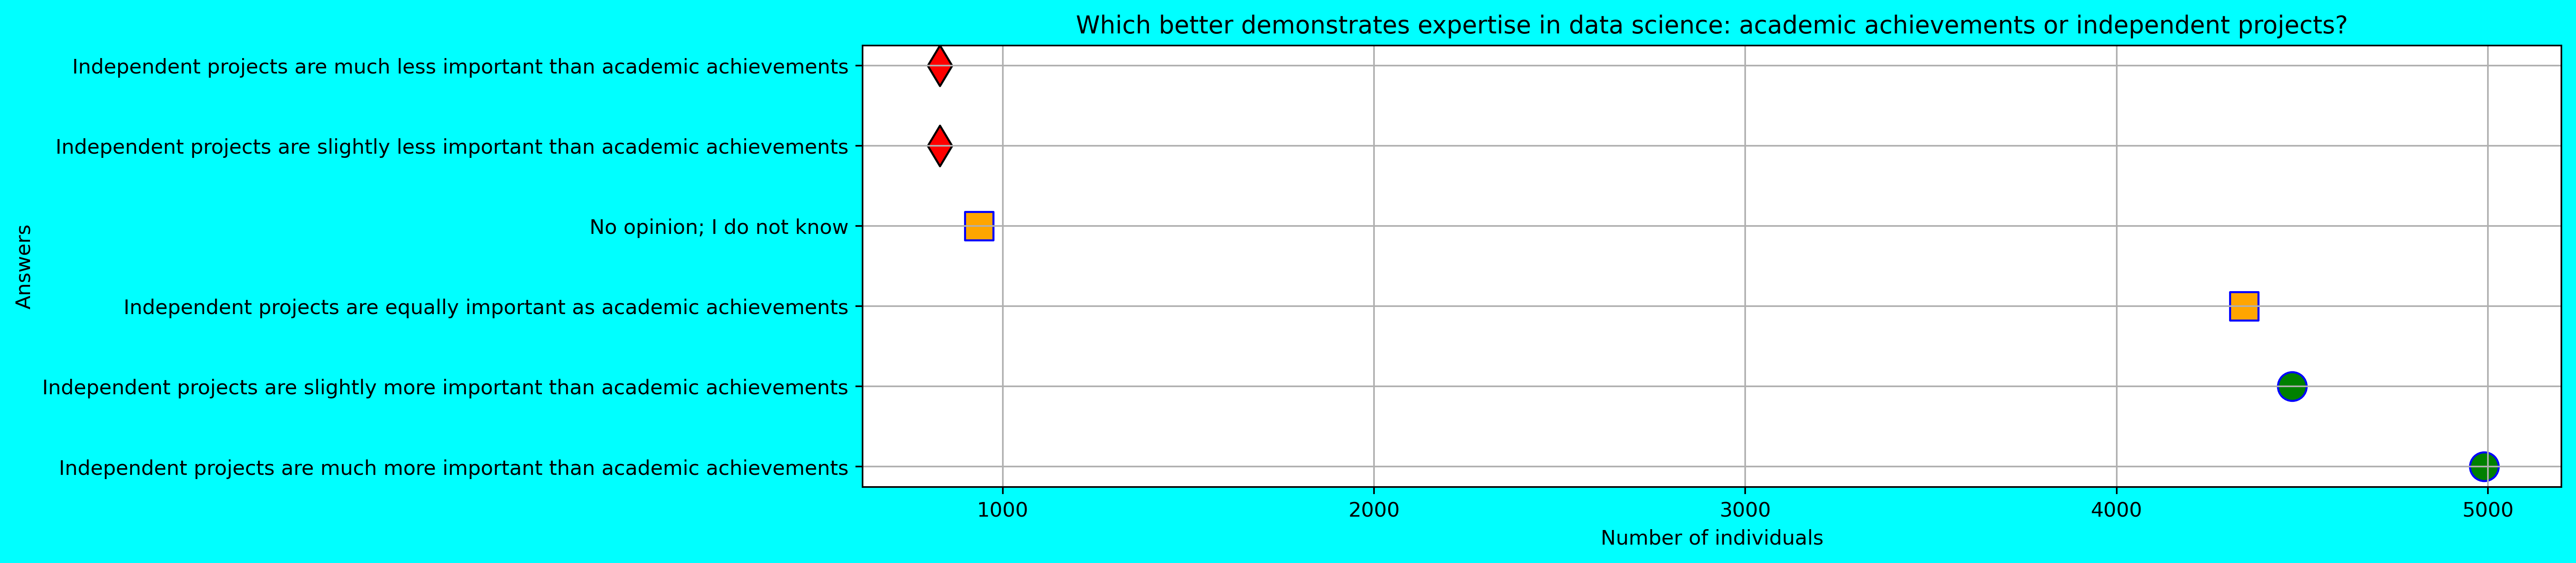

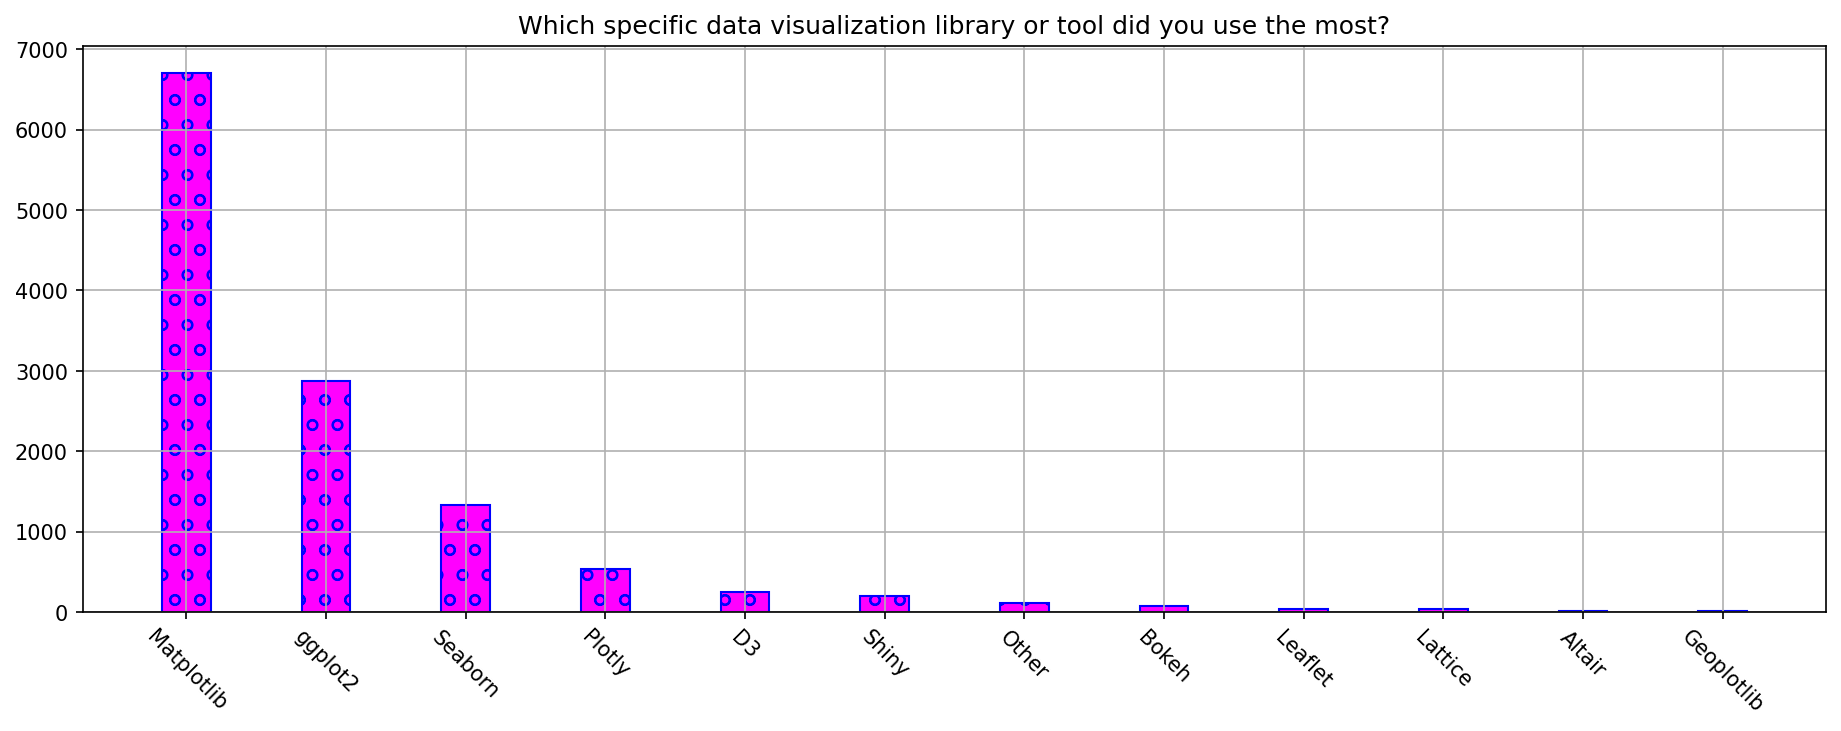

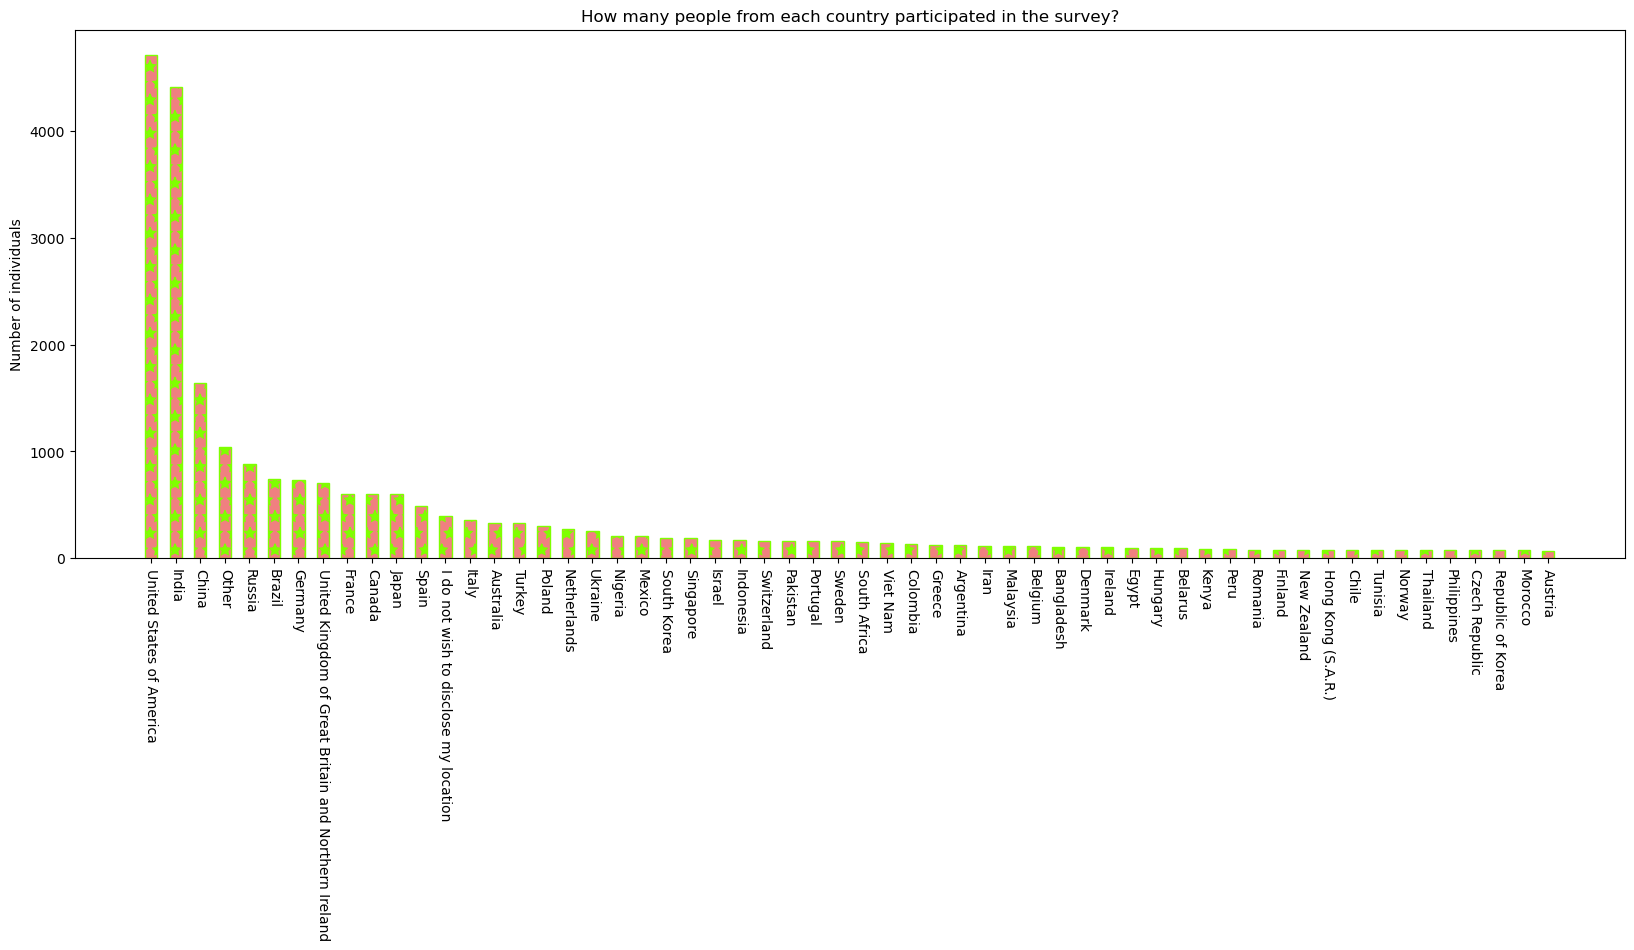

In [51]:
class Graphic():
    def Country():
        countries=["United States of America","India","China","Other","Russia","Brazil","Germany",
        "United Kingdom of Great Britain and Northern Ireland","France","Canada","Japan","Spain",
        "I do not wish to disclose my location","Italy","Australia","Turkey","Poland","Netherlands",
        "Ukraine","Nigeria","Mexico","South Korea","Singapore","Israel","Indonesia","Switzerland",
        "Pakistan","Portugal","Sweden","South Africa","Viet Nam","Colombia","Greece","Argentina",
        "Iran","Malaysia","Belgium","Bangladesh","Denmark","Ireland",
        "Egypt","Hungary","Belarus","Kenya","Peru","Romania","Finland","New Zealand",
        "Hong Kong (S.A.R.)","Chile","Tunisia","Norway","Thailand","Philippines",
        "Czech Republic","Republic of Korea","Morocco","Austria"]
        person=[4716,4417,1644,1036,879,736,734,702,604,604,597,485,394,355,330,327,301,
        270,252,208,202,188,186,173,171,164,161,155,155,147,144,128,121,119,113,113,111,
        107,106,101,96,93,91,85,81,79,79,77,76,76,74,74,73,73,72,71,71,62]

        xs = [i + 0.5 for i, _ in enumerate(countries)]
        plt.subplots(figsize=(20,7),dpi=100)
        plt.bar(xs, person, hatch="*",width=.5,edgecolor="chartreuse",color="lightcoral")

        plt.ylabel("Number of individuals")
        plt.title("How many people from each country participated in the survey?")
        plt.xticks([i + 0.5 for i, _ in enumerate(countries)],countries,rotation=-90) 
        plt.grid(False)
        
        plt.savefig("Country.png")
        plt.show()
    #Country()
     
    def Do_you_consider_yourself_to_be_a_data_scientist():
        
        answers = ["Probably yes","Definitely yes","Maybe","Probably not","Definitely not"]
        person= [4893,4684,4184,3162,1557]
        xs = [i + 0.5 for i, _ in enumerate(answers)]
        
        plt.subplots(figsize=(12,3),dpi=100)
        plt.bar(xs, person, hatch="-.",width=.2,color="lightcoral") 
        
        plt.xlabel("answers")
        plt.title("Do you consider yourself to be a data scientist?")
        plt.xticks([i + 0.5 for i, _ in enumerate(answers)],answers)
        plt.grid(True)
        
        plt.savefig("Do_you_consider_yourself_to_be_a_data_scientist.png")
        plt.show()
    #Do_you_consider_yourself_to_be_a_data_scientist()
    
    def On_which_online_platform_have_you_spent_the_most_amount_of_time():  
        y= [3748,1166,1146,816,778,663,502,337,233,117,105,26]
        x = ["Coursera","DataCamp","Udemy","Udacity","edX","Kaggle Learn",
            "Online University Courses","Other","Fast.AI","developers.google.com","DataQuest","TheSchool.AI"]
        renkler = ['aquamarine','magenta','orange','blue',"deeppink","cyan","coral","gold","black","aqua","violet"]
        plt.pie(y,labels=x,startangle=-90,
        shadow= True,explode=( 0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.4,0.6,0.8,1),autopct='%1.2f%%',colors=renkler) 
        plt.title("On which online platform have you spent the most amount of time?")
        
        plt.savefig("On which online platform have you spent the most amount of time.png")
        plt.show()
    
    #On_which_online_platform_have_you_spent_the_most_amount_of_time()
    
    def What_is_the_type_of_data_that_you_currently_interact_with_most_often_at_work_or_school():
        data_type= ["Numerical Data","Tabular Data","Text Data","Time Series Data","Image Data","Categorical Data","Sensor Data",
               "Geospatial Data","Video Data","Genetic Data","Audio Data","Other Data"]
        y = [3588,2680,2005,1664,1635,998,494,257,204,173,117,63]

        fig, ax = plt.subplots(figsize=(20,7),dpi=100)
        ax.stem(data_type,y)
        plt.title("What is the type of data that you currently interact with most often at work or school?")
        plt.xlabel("DATA TYPE")
         
        plt.grid(True)
        plt.savefig("What_is_the_type_of_data_that_you_currently_interact_with_most_often_at_work_or_school.png")
        plt.show()
        
    #3What_is_the_type_of_data_that_you_currently_interact_with_most_often_at_work_or_school()
    
    def Which_best_describes_your_undergraduate_major():
        z = [9430,3705,2950,1791,1110,1029,871,770,554,269,253,128,87]
        answers = ["Computer science (software engineering, etc.)","Engineering (non-computer focused)","Mathematics or statistics",
         "A business discipline (accounting, economics, finance, etc.)","Physics or astronomy","Information technology, networking, or system administration",
         "Medical or life sciences (biology, chemistry, medicine, etc.)",
         "Other","Social sciences (anthropology, psychology, sociology, etc.)","Humanities (history, literature, philosophy, etc.)",
         "Environmental science or geology","I never declared a major","Fine arts or performing arts"]

        fig = go.Figure(data=[go.Pie(labels=answers, values=z)])
        
        plt.savefig("Which best describes your undergraduate major.png")
        fig.show()
    #Which_best_describes_your_undergraduate_major()
    
    def Which_specific_data_visualization_library_or_tool_did_you_use_the_most():
        x = ["Matplotlib","ggplot2","Seaborn","Plotly","D3","Shiny","Other","Bokeh","Leaflet","Lattice","Altair","Geoplotlib"]
        y = [6707,2877,1334,540,243,199,110,77,39,33,16,9]
        
        xs = [i + 0.5 for i, _ in enumerate(x)]
        plt.subplots(figsize=(15,5),dpi=150)
        plt.bar(xs, y, hatch="o",width=.35,edgecolor="blue",color="magenta")
        
        plt.title("Which specific data visualization library or tool did you use the most?")
        plt.xticks([i + 0.5 for i, _ in enumerate(x)],x,rotation=-45) #,rotation=90
        plt.grid(True)
        
        plt.savefig("Which specific data visualization library or tool did you use the most.png")
        plt.show()
    #Which_specific_data_visualization_library_or_tool_did_you_use_the_most()
    
    def Age_range():
        x=["18-21","22-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-69","70-79","80+"]
        z = [3037,5141,6159,3776,2253,1360,858,582,328,273,53,39]
        xs = [i + 0.5 for i, _ in enumerate(x)]
        plt.subplots(figsize=(15,5),dpi=100)
        plt.bar(xs, z, hatch="/",width=.5,edgecolor="k",color="cyan")
        
        
        plt.title("Age range")
        plt.xticks([i + 0.5 for i, _ in enumerate(x)],x)
        plt.grid(False)
        
        plt.savefig("Age_range.png")
        plt.show()
    #Age_range()
  
    def Gender():
        sizes = [df.groupby("Gender").get_group("Male")["Gender"].count(),df.groupby("Gender").get_group("Female")["Gender"].count()]
        labels = ["Male","Female"]
        colors = ['#FF0000', '#0000FF'] 
        explode = (0.025, 0.025)
        plt.pie(sizes, colors=colors, labels=labels,
                autopct='%1.1f%%', pctdistance=0.80,explode=explode) ## pctdistance içteki yazıların yerini ayarlar

        centre_circle = plt.Circle((0,0), 0.60, fc='white')
        fig = plt.gcf()

        fig.gca().add_artist(centre_circle)

        plt.title("Gender")
        plt.legend(labels , loc="upper right" ) 
        plt.savefig("Gender.png")
        plt.show()
    #Gender()
    
    def Which_of_the_following_relational_database_products_have_you_used_at_work_or_school_in_the_last_5_years():
        height = df.count()[["Q29_Part_1","Q29_Part_2","Q29_Part_3","Q29_Part_4","Q29_Part_5","Q29_Part_6","Q29_Part_7","Q29_Part_8",
        "Q29_Part_9","Q29_Part_10","Q29_Part_11","Q29_Part_12","Q29_Part_13","Q29_Part_14","Q29_Part_15","Q29_Part_16","Q29_Part_17","Q29_Part_18",
        "Q29_Part_19","Q29_Part_20","Q29_Part_21","Q29_Part_22","Q29_Part_23","Q29_Part_24","Q29_Part_25","Q29_Part_26","Q29_Part_28"]]

        bars =["AWS Relational Database Service","AWS Aurora","Google Cloud SQL","Google Cloud Spanner","AWS DynamoDB","Google Cloud Datastore","Google Cloud Bigtable",
            "AWS SimpleDB","Microsoft SQL Server","MySQL","PostgresSQL","SQLite","Oracle Database","Ingres","Microsoft Access","NexusDB","SAP IQ","Google Fusion Tables ",
            "Azure Database for MySQL ","Azure Cosmos DB","Azure SQL Database","Azure Database for PostgreSQL","IBM Cloud Compose","IBM Cloud Compose for MySQL","IBM Cloud Compose for PostgreSQL",    
            "IBM Cloud Db2","Other"]
        x_pos = np.arange(len(bars))
        plt.subplots(figsize=(15,5) , dpi=100)
        plt.bar(x_pos, height, color=['m',"gold",'red',"lawngreen","deepskyblue","blue","fuchsia","teal","lightcoral","cyan","violet","deeppink","aquamarine"],alpha=1)
        plt.xticks(x_pos,bars,rotation=-90)
        plt.title("Which of the following relational database products have you used at work or school in the last 5 years? ")
        plt.grid(False)
        plt.savefig("Which of the following relational database products have you used at work or school in the last 5 years.png")
        plt.show()

    #Which_of_the_following_relational_database_products_have_you_used_at_work_or_school_in_the_last_5_years()
    
    def What_specific_programming_language_do_you_use_most_often():
        x=["Python","R","SQL","Java","C/C++","C#/.NET","Javascript/Typescript","Matlab","SAS/STATA","PHP","Visual Basic/VBA","Other",
        "Scala","Bash","Ruby","Go","Julia"]
        y=[8180,2046,1211,903,739,432,408,355,228,191,135,117,106,59,55,46,11]

        fig, ax = plt.subplots(figsize=(15,5))   
        width = 0.1  
        ind = np.arange(len(y))  
        ax.barh(ind, y, width, color=["lime","red","cyan"])      
        ax.set_yticks(ind+width/2)
        ax.set_yticklabels(x, minor=False)
        for i, v in enumerate(y):
            ax.text(v + 150, i + .01, str(v), color='indigo', fontweight='light',variant='small-caps',style="normal",alpha=0.5,family="serif",verticalalignment='center',horizontalalignment='left')    ## fontweight [ 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight']
        plt.scatter(y,x,marker='d',color='dodgerblue',linestyle='-',linewidth=2)
        
        plt.grid(False)
        plt.title('What specific programming language do you use most often?')
        plt.savefig('What specific programming language do you use most often.png')
        plt.show()
        
        
        
    def What_programming_language_would_you_recommend_an_aspiring_data_scientist_to_learn_first():
        #x=["Python","R","SQL","C++","Matlab","Java","Other","Scala","Javascript","SAS","VBA","Go"]
        x=["Go","VBA","SAS","Javascript","Scala","Other","Java","Matlab","C++","SQL","R","Python"]
        #y=[14181,2342,914,339,256,184,161,74,72,69,38,26]
        y=[26,38,69,72,74,161,184,256,339,914,2342,14181]

        fig, ax = plt.subplots(figsize=(15,7))   
        width = 0.5               # the width of the bars 
        ind = np.arange(len(y))  # the x locations for the groups
        ax.barh(ind, y, width, color=["springgreen","springgreen","springgreen","springgreen","springgreen","springgreen","springgreen","springgreen","springgreen","springgreen","springgreen","fuchsia"])    #["cyan","red","magenta"]
        ax.set_yticks(ind+width/2)
        ax.set_yticklabels(x, minor=False)

        for i, v in enumerate(y):
            ax.text(v + 150, i + .01, str(v),color='deeppink', fontweight='light',variant='small-caps',style="normal",alpha=0.8,family="serif",verticalalignment='center',horizontalalignment='left')

        plt.grid(True)
        plt.savefig('What programming language would you recommend an aspiring data scientist to learn first.png')
        plt.title('What programming language would you recommend an aspiring data scientist to learn first?')
        plt.show()
    #What_programming_language_would_you_recommend_an_aspiring_data_scientist_to_learn_first()
    
    
    def Which_better_demonstrates_expertise_in_data_science_academic_achievements_or_independent_projects():
        answers = ["Independent projects are much more important than academic achievements","Independent projects are slightly more important than academic achievements"]
        person= [df.groupby("Q40").get_group("Independent projects are much more important than academic achievements").count()["Q40"],
            df.groupby("Q40").get_group("Independent projects are slightly more important than academic achievements").count()["Q40"]]

        answerss=["Independent projects are equally important as academic achievements","No opinion; I do not know"]
        personn=[df.groupby("Q40").get_group("Independent projects are equally important as academic achievements").count()["Q40"],
            df.groupby("Q40").get_group("No opinion; I do not know").count()["Q40"]]

        answersss=["Independent projects are slightly less important than academic achievements","Independent projects are much less important than academic achievements"]
        personnn=[df.groupby("Q40").get_group("Independent projects are slightly less important than academic achievements").count()["Q40"],
            df.groupby("Q40").get_group("Independent projects are slightly less important than academic achievements").count()["Q40"]]
        f=plt.figure(figsize=(15,4),facecolor="cyan",dpi=350)

        plt.scatter(person,answers,s=200,color="green",edgecolors="blue",marker="o")
        plt.scatter(personn,answerss,s=200,color="orange",edgecolors="blue",marker="s")
        plt.scatter(personnn,answersss,s=200,color="red",edgecolors="black",marker="d")
        plt.xlabel("Number of individuals")
        plt.ylabel("Answers")
        plt.title("Which better demonstrates expertise in data science: academic achievements or independent projects?")
        plt.savefig("Independent projects are much more important than academic achievements.png")
        plt.grid(True)
        plt.show()
    #Which_better_demonstrates_expertise_in_data_science_academic_achievements_or_independent_projects()
    
    
    
Graphic.Gender()
Graphic.Age_range()
Graphic.On_which_online_platform_have_you_spent_the_most_amount_of_time()
Graphic.Which_of_the_following_relational_database_products_have_you_used_at_work_or_school_in_the_last_5_years()
Graphic.What_is_the_type_of_data_that_you_currently_interact_with_most_often_at_work_or_school()
Graphic.Which_best_describes_your_undergraduate_major()
Graphic.What_specific_programming_language_do_you_use_most_often()
Graphic.What_programming_language_would_you_recommend_an_aspiring_data_scientist_to_learn_first()
Graphic.Do_you_consider_yourself_to_be_a_data_scientist()
Graphic.Which_better_demonstrates_expertise_in_data_science_academic_achievements_or_independent_projects()
Graphic.Which_specific_data_visualization_library_or_tool_did_you_use_the_most()
Graphic.Country()





C:\Users\user\AppData\Local\Temp\ipykernel_6156\3397285270.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



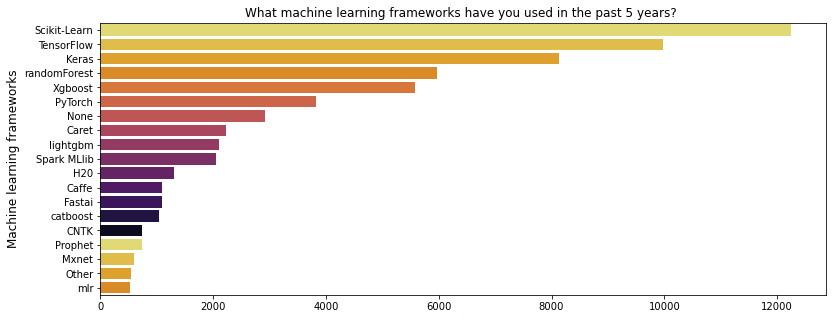

In [53]:
df= pd.read_csv('multipleChoiceResponses.csv', low_memory=False)
df = df.drop(0)
def mulitple_choice_to_dataframe(dataframe, question_number, new_column_name1, new_column_name2, sort_ascending_df = False):
        use_features = [x for x in dataframe.columns if x.find(question_number) != -1]
        temp = dataframe[use_features[:-1]].apply(pd.value_counts).reset_index()
        temp = temp.melt('index', value_name='key').drop('variable', 1).dropna()
        temp.columns = [new_column_name1, new_column_name2] 
        temp = temp.sort_values(by=new_column_name2, ascending=sort_ascending_df)
        return temp
def plot_bar(dataframe, title, y_axix_column, x_axis_column,
        figure_size=(13,5),y_ticks_font=10, x_ticks_font=10):
        plt.figure(figsize=figure_size)
        plt.title(title,fontsize=12)
        plt.yticks(fontsize=y_ticks_font)
        plt.xticks(fontsize=x_ticks_font)
        plt.xlabel(x_axis_column,fontsize=0)
        plt.ylabel(y_axix_column,fontsize=12)
        sns.barplot(y=y_axix_column, x = x_axis_column, 
            data=dataframe, palette=sns.color_palette('inferno_r',15))
        plt.show()
plot_df_ml_lib = mulitple_choice_to_dataframe(df,"Q19","Machine learning frameworks",".")

plot_bar(plot_df_ml_lib, title="What machine learning frameworks have you used in the past 5 years? ",
         y_axix_column='Machine learning frameworks', x_axis_column = '.')